In [1]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np # linear algebra
import os
import random
import sys

In [2]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
## 데이터 불러오기
med19 = pd.read_csv('./Medical_Check_2019.csv')
med19 = med19.drop(['결손치 유무', '치아마모증유무', '제3대구치(사랑니) 이상'], axis=1)

med18 = pd.read_csv('./Medical_Check_2018.csv')
med18 = med18.drop(['결손치유무', '치아마모증유무', '제3대구치(사랑니)이상'], axis=1)

med17 = pd.read_csv('./Medical_Check_2017.csv')
med17 = med17.drop(['결손치유무', '치아마모증유무', '제3대구치(사랑니)이상'], axis=1)

med16 = pd.read_csv('./Medical_Check_2016.csv')
# med16 = med16.drop(['결손치유무', '치아마모증유무', '제3대구치(사랑니)이상'], axis=1)

In [4]:
## 19년도 컬럼 재배치
med19 = med19.loc[:, ['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', 
                      '시도코드', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레', 
                      '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
                      '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 
                      'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌', 
                      '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', 
                      '음주여부', '구강검진 수검여부', '치아우식증유무', '치석', '데이터 공개일자']]
med19.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '치석', '데이터 공개일자'],
      dtype='object')

In [5]:
## 시도코드 변환
med19['시도코드'] = med19['시도코드'].map({11: '서울특별시', 41: '경기도', 42: '강원도', 26: '부산광역시', 27: '대구광역시', 28: '인천광역시',
                                 29: '광주광역시', 30: '대전광역시', 31: '울산광역시', 36: '세종시', 
                                 43: '충청북도', 44: '충청남도', 45: '전라북도', 46: '전라남도', 47: '경상북도', 48: '경상남도', 50: '제주도'})
med18['시도코드'] = med18['시도코드'].map({11: '서울특별시', 41: '경기도', 42: '강원도', 26: '부산광역시', 27: '대구광역시', 28: '인천광역시',
                                 29: '광주광역시', 30: '대전광역시', 31: '울산광역시', 36: '세종시', 
                                 43: '충청북도', 44: '충청남도', 45: '전라북도', 46: '전라남도', 47: '경상북도', 48: '경상남도', 50: '제주도'})
med17['시도코드'] = med17['시도코드'].map({11: '서울특별시', 41: '경기도', 42: '강원도', 26: '부산광역시', 27: '대구광역시', 28: '인천광역시',
                                 29: '광주광역시', 30: '대전광역시', 31: '울산광역시', 36: '세종시', 
                                 43: '충청북도', 44: '충청남도', 45: '전라북도', 46: '전라남도', 47: '경상북도', 48: '경상남도', 49: '제주도'})
med16['시도코드'] = med16['시도코드'].map({11: '서울특별시', 41: '경기도', 42: '강원도', 26: '부산광역시', 27: '대구광역시', 28: '인천광역시',
                                 29: '광주광역시', 30: '대전광역시', 31: '울산광역시', 36: '세종시', 
                                 43: '충청북도', 44: '충청남도', 45: '전라북도', 46: '전라남도', 47: '경상북도', 48: '경상남도', 49: '제주도'})

In [6]:
## 데이터 합치기
med_total = pd.concat([med19, med18, med17, med16], ignore_index=True)
med_total.shape

(4000000, 31)

In [7]:
## 4개 항목 제거
med_total = med_total.drop(['기준년도', '가입자일련번호','치아우식증유무',
                            '치석', '데이터 공개일자'], axis=1)
## 결측치 제거
med_total_1 = med_total.dropna()

In [8]:
sel = med_total_1[med_total_1['시도코드'] == '서울특별시']
pus = med_total_1[med_total_1['시도코드'] == '부산광역시']
tae = med_total_1[med_total_1['시도코드'] == '대구광역시']
icn = med_total_1[med_total_1['시도코드'] == '인천광역시']
kwj = med_total_1[med_total_1['시도코드'] == '광주광역시']
tjn = med_total_1[med_total_1['시도코드'] == '대전광역시']
usn = med_total_1[med_total_1['시도코드'] == '울산광역시']
sjs = med_total_1[med_total_1['시도코드'] == '세종시']
ggd = med_total_1[med_total_1['시도코드'] == '경기도']
gwd = med_total_1[med_total_1['시도코드'] == '강원도']
ccb = med_total_1[med_total_1['시도코드'] == '충청북도']
ccn = med_total_1[med_total_1['시도코드'] == '충청남도']
jlb = med_total_1[med_total_1['시도코드'] == '전라북도']
jln = med_total_1[med_total_1['시도코드'] == '전라남도']
gsb = med_total_1[med_total_1['시도코드'] == '경상북도']
gsn = med_total_1[med_total_1['시도코드'] == '경상남도']
cju = med_total_1[med_total_1['시도코드'] == '제주도']


### 광역시별(서울, 세종 포함) 지역별 신장/체중

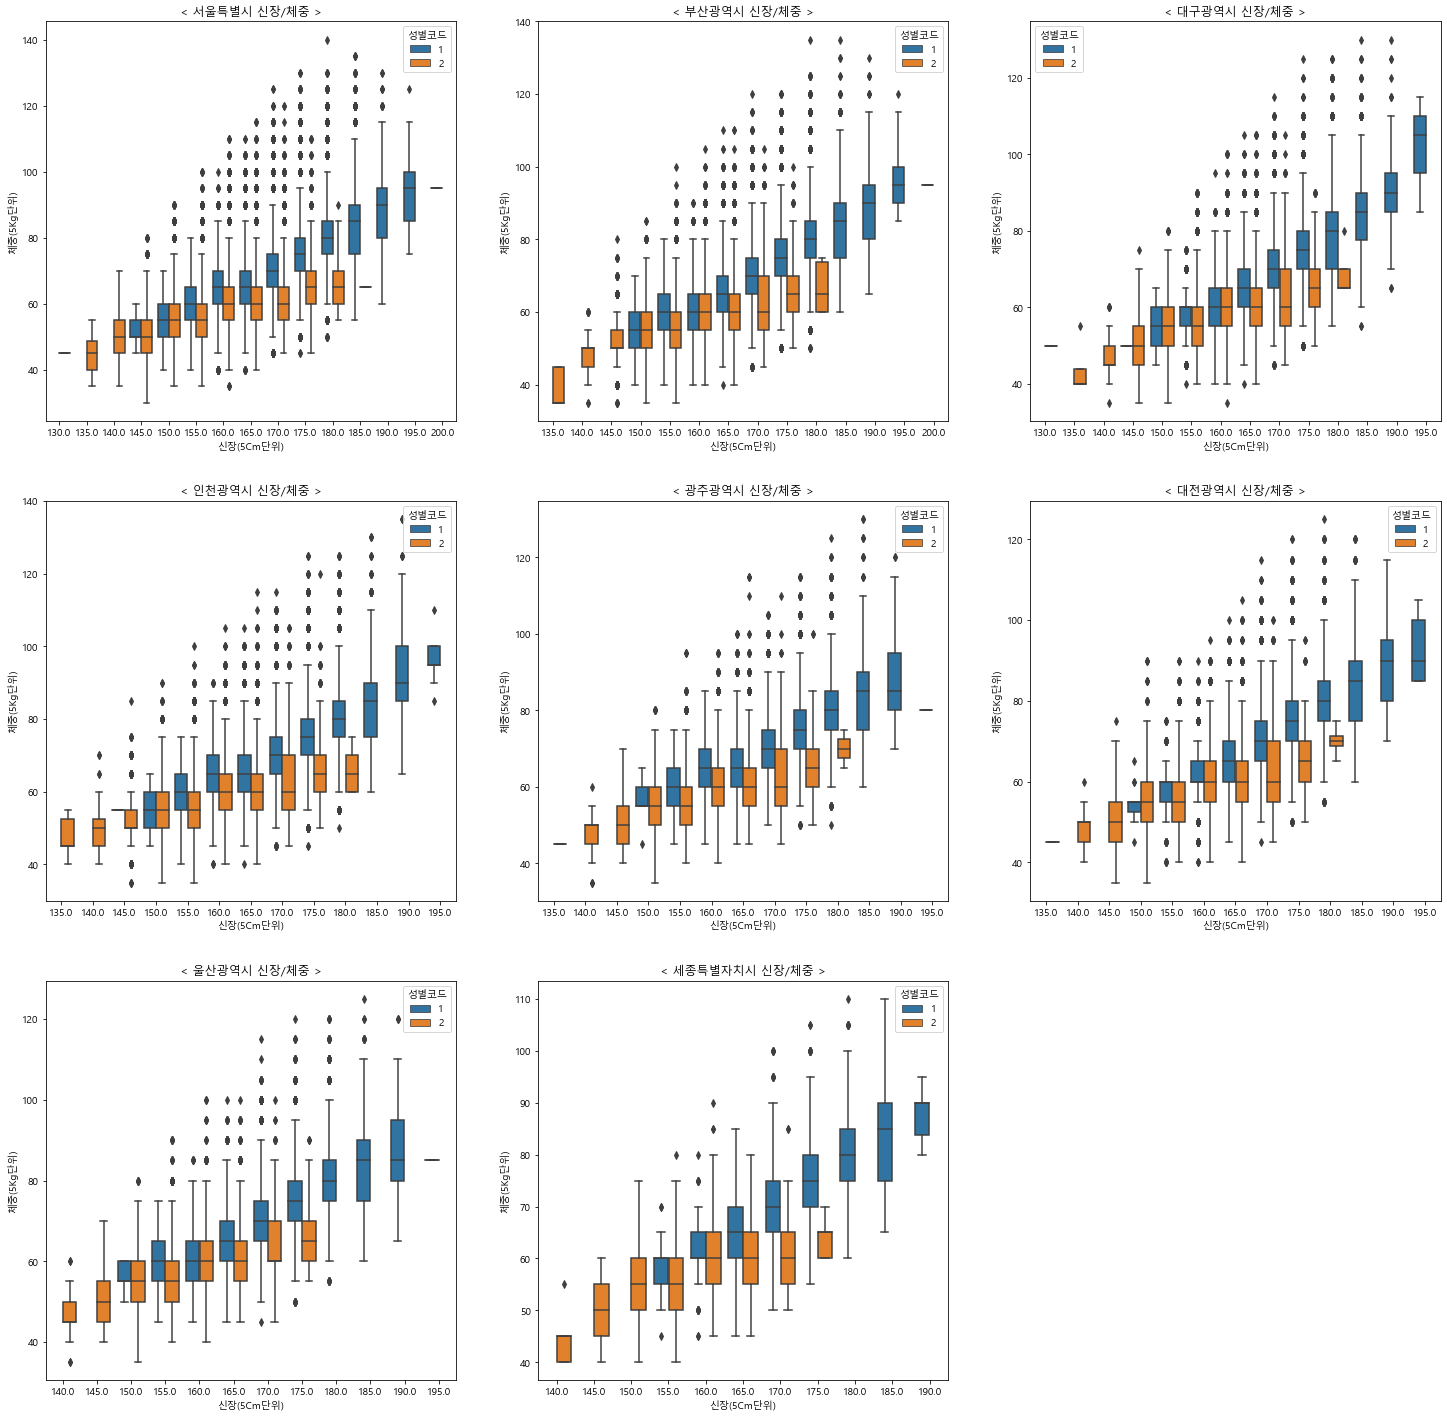

In [9]:
### 지역별 boxplot 신장/체중

plt.figure(figsize=(25,25), facecolor='white')

plt.subplot(331)
sns.boxplot(x="신장(5Cm단위)", y="체중(5Kg단위)", hue='성별코드', data=sel)
plt.title('< 서울특별시 신장/체중 >')

plt.subplot(332)
sns.boxplot(x="신장(5Cm단위)", y="체중(5Kg단위)", hue='성별코드', data=pus)
plt.title('< 부산광역시 신장/체중 >')

plt.subplot(333)
sns.boxplot(x="신장(5Cm단위)", y="체중(5Kg단위)", hue='성별코드', data=tae)
plt.title('< 대구광역시 신장/체중 >')

plt.subplot(334)
sns.boxplot(x="신장(5Cm단위)", y="체중(5Kg단위)", hue='성별코드', data=icn)
plt.title('< 인천광역시 신장/체중 >')

plt.subplot(335)
sns.boxplot(x="신장(5Cm단위)", y="체중(5Kg단위)", hue='성별코드', data=kwj)
plt.title('< 광주광역시 신장/체중 >')

plt.subplot(336)
sns.boxplot(x="신장(5Cm단위)", y="체중(5Kg단위)", hue='성별코드', data=tjn)
plt.title('< 대전광역시 신장/체중 >')

plt.subplot(337)
sns.boxplot(x="신장(5Cm단위)", y="체중(5Kg단위)", hue='성별코드', data=usn)
plt.title('< 울산광역시 신장/체중 >')

plt.subplot(338)
sns.boxplot(x="신장(5Cm단위)", y="체중(5Kg단위)", hue='성별코드', data=sjs)
plt.title('< 세종특별자치시 신장/체중 >')

plt.show()

### 도별 지역별 신장/체중

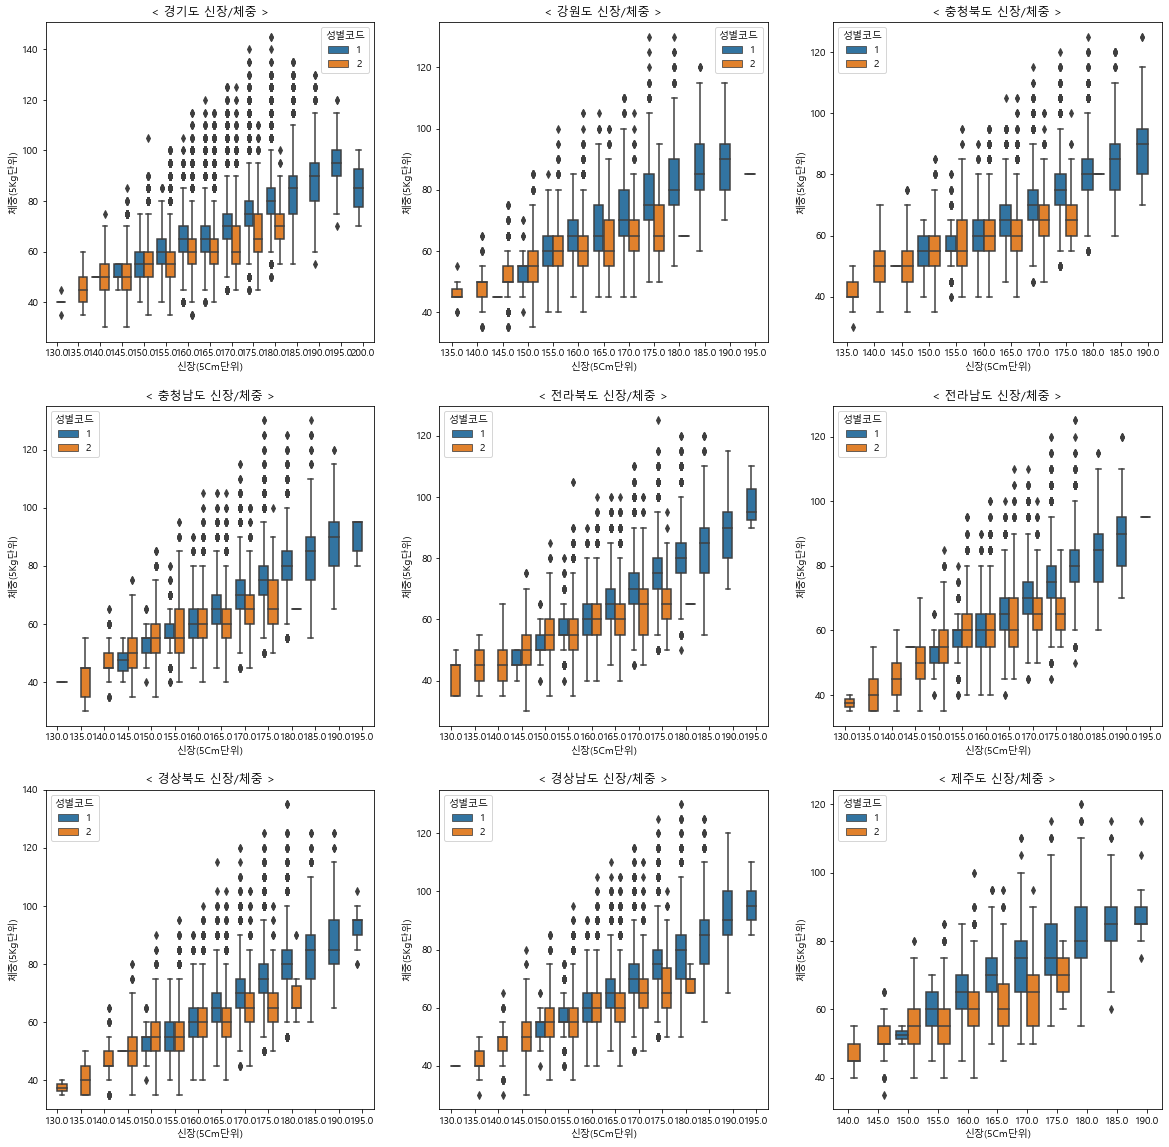

In [10]:
### 지역별 boxplot 신장/체중

plt.figure(figsize=(20,20), facecolor='white')

plt.subplot(331)
sns.boxplot(x="신장(5Cm단위)", y="체중(5Kg단위)", hue='성별코드', data=ggd)
plt.title('< 경기도 신장/체중 >')

plt.subplot(332)
sns.boxplot(x="신장(5Cm단위)", y="체중(5Kg단위)", hue='성별코드', data=gwd)
plt.title('< 강원도 신장/체중 >')

plt.subplot(333)
sns.boxplot(x="신장(5Cm단위)", y="체중(5Kg단위)", hue='성별코드', data=ccb)
plt.title('< 충청북도 신장/체중 >')

plt.subplot(334)
sns.boxplot(x="신장(5Cm단위)", y="체중(5Kg단위)", hue='성별코드', data=ccn)
plt.title('< 충청남도 신장/체중 >')

plt.subplot(335)
sns.boxplot(x="신장(5Cm단위)", y="체중(5Kg단위)", hue='성별코드', data=jlb)
plt.title('< 전라북도 신장/체중 >')

plt.subplot(336)
sns.boxplot(x="신장(5Cm단위)", y="체중(5Kg단위)", hue='성별코드', data=jln)
plt.title('< 전라남도 신장/체중 >')

plt.subplot(337)
sns.boxplot(x="신장(5Cm단위)", y="체중(5Kg단위)", hue='성별코드', data=gsb)
plt.title('< 경상북도 신장/체중 >')

plt.subplot(338)
sns.boxplot(x="신장(5Cm단위)", y="체중(5Kg단위)", hue='성별코드', data=gsn)
plt.title('< 경상남도 신장/체중 >')

plt.subplot(339)
sns.boxplot(x="신장(5Cm단위)", y="체중(5Kg단위)", hue='성별코드', data=cju)
plt.title('< 제주도 신장/체중 >')

plt.show()

Text(0.5, 1.0, '< 서울특별시 신장/체중 >')

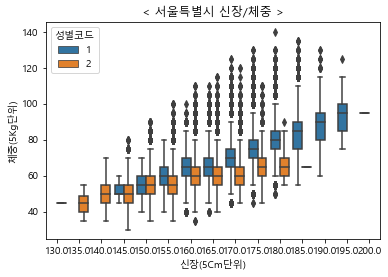

In [11]:
sns.boxplot(x="신장(5Cm단위)", y="체중(5Kg단위)", hue='성별코드', data=sel)
plt.title('< 서울특별시 신장/체중 >')

Text(0.5, 1.0, '< 부산광역시 신장/체중 >')

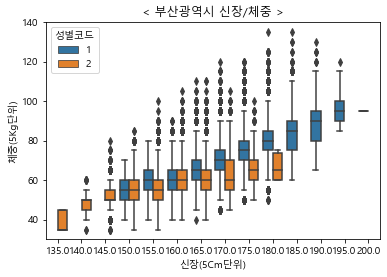

In [12]:
sns.boxplot(x="신장(5Cm단위)", y="체중(5Kg단위)", hue='성별코드', data=pus)
plt.title('< 부산광역시 신장/체중 >')

Text(0.5, 1.0, '< 대구광역시 신장/체중 >')

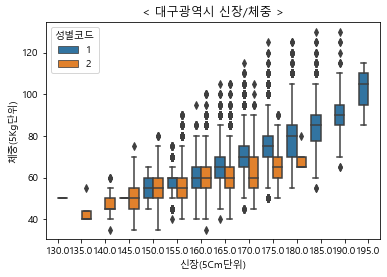

In [13]:
sns.boxplot(x="신장(5Cm단위)", y="체중(5Kg단위)", hue='성별코드', data=tae)
plt.title('< 대구광역시 신장/체중 >')

Text(0.5, 1.0, '< 인천광역시 신장/체중 >')

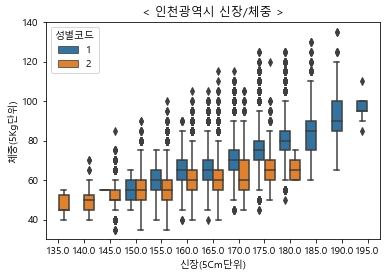

In [14]:
sns.boxplot(x="신장(5Cm단위)", y="체중(5Kg단위)", hue='성별코드', data=icn)
plt.title('< 인천광역시 신장/체중 >')

Text(0.5, 1.0, '< 광주광역시 신장/체중 >')

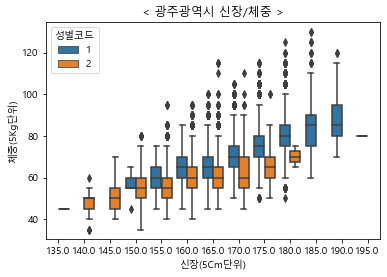

In [15]:
sns.boxplot(x="신장(5Cm단위)", y="체중(5Kg단위)", hue='성별코드', data=kwj)
plt.title('< 광주광역시 신장/체중 >')

Text(0.5, 1.0, '< 대전광역시 신장/체중 >')

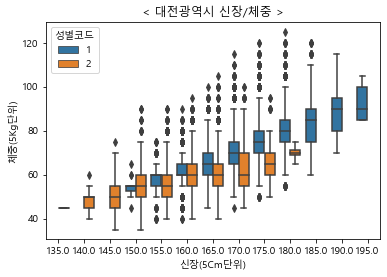

In [16]:
sns.boxplot(x="신장(5Cm단위)", y="체중(5Kg단위)", hue='성별코드', data=tjn)
plt.title('< 대전광역시 신장/체중 >')

Text(0.5, 1.0, '< 울산광역시 신장/체중 >')

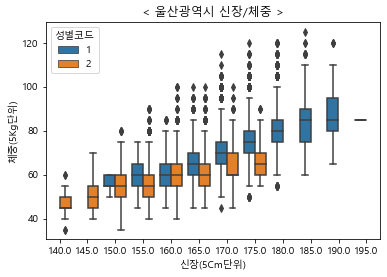

In [17]:
sns.boxplot(x="신장(5Cm단위)", y="체중(5Kg단위)", hue='성별코드', data=usn)
plt.title('< 울산광역시 신장/체중 >')

Text(0.5, 1.0, '< 세종특별자치시 신장/체중 >')

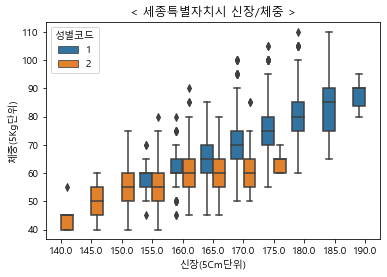

In [18]:
sns.boxplot(x="신장(5Cm단위)", y="체중(5Kg단위)", hue='성별코드', data=sjs)
plt.title('< 세종특별자치시 신장/체중 >')

Text(0.5, 1.0, '< 경기도 신장/체중 >')

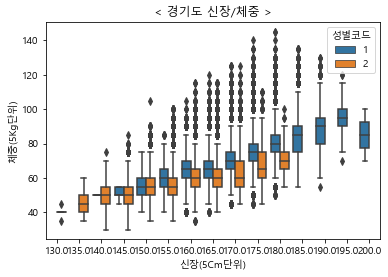

In [19]:
sns.boxplot(x="신장(5Cm단위)", y="체중(5Kg단위)", hue='성별코드', data=ggd)
plt.title('< 경기도 신장/체중 >')

Text(0.5, 1.0, '< 강원도 신장/체중 >')

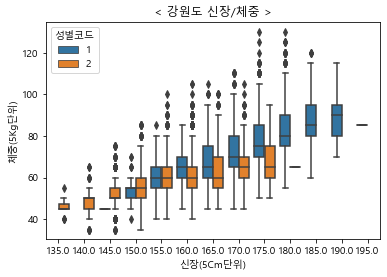

In [20]:
sns.boxplot(x="신장(5Cm단위)", y="체중(5Kg단위)", hue='성별코드', data=gwd)
plt.title('< 강원도 신장/체중 >')

Text(0.5, 1.0, '< 충청북도 신장/체중 >')

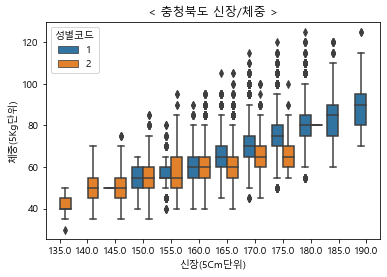

In [21]:
sns.boxplot(x="신장(5Cm단위)", y="체중(5Kg단위)", hue='성별코드', data=ccb)
plt.title('< 충청북도 신장/체중 >')

Text(0.5, 1.0, '< 충청남도 신장/체중 >')

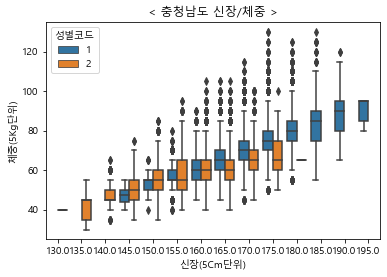

In [22]:
sns.boxplot(x="신장(5Cm단위)", y="체중(5Kg단위)", hue='성별코드', data=ccn)
plt.title('< 충청남도 신장/체중 >')

Text(0.5, 1.0, '< 전라북도 신장/체중 >')

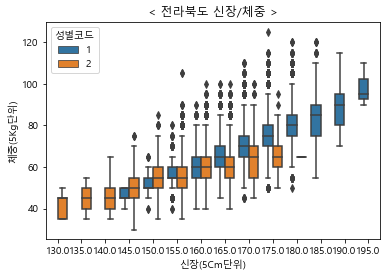

In [23]:
sns.boxplot(x="신장(5Cm단위)", y="체중(5Kg단위)", hue='성별코드', data=jlb)
plt.title('< 전라북도 신장/체중 >')

Text(0.5, 1.0, '< 전라남도 신장/체중 >')

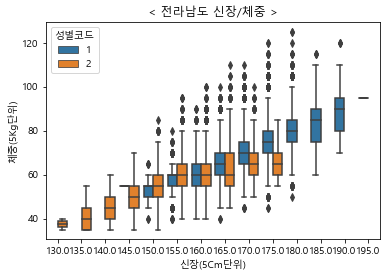

In [24]:
sns.boxplot(x="신장(5Cm단위)", y="체중(5Kg단위)", hue='성별코드', data=jln)
plt.title('< 전라남도 신장/체중 >')

Text(0.5, 1.0, '< 경상북도 신장/체중 >')

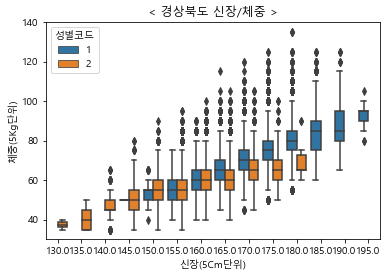

In [25]:
sns.boxplot(x="신장(5Cm단위)", y="체중(5Kg단위)", hue='성별코드', data=gsb)
plt.title('< 경상북도 신장/체중 >')

Text(0.5, 1.0, '< 경상남도 신장/체중 >')

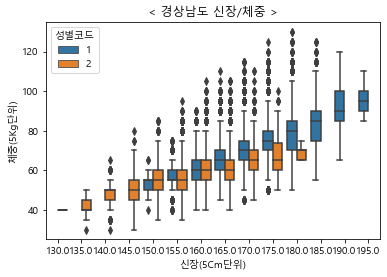

In [26]:
sns.boxplot(x="신장(5Cm단위)", y="체중(5Kg단위)", hue='성별코드', data=gsn)
plt.title('< 경상남도 신장/체중 >')

Text(0.5, 1.0, '< 제주도 신장/체중 >')

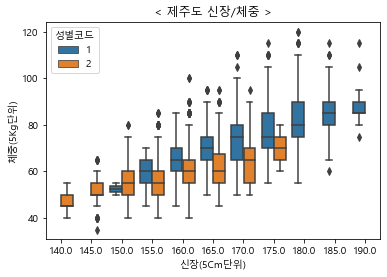

In [27]:
sns.boxplot(x="신장(5Cm단위)", y="체중(5Kg단위)", hue='성별코드', data=cju)
plt.title('< 제주도 신장/체중 >')